<a href="https://colab.research.google.com/github/ahmedaashraf/Movie-Review-Classification/blob/master/MovieReviewClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow

In [0]:

import tensorflow as tf
from tensorflow.python.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
print(y_train[0])

1


In [0]:
class_names = ['Negative', 'Positive']

In [0]:
word_index = imdb.get_word_index()
print(word_index['hello'])

1646592/1641221 [==============================] - 0s 0us/step
4822


In [0]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [0]:
def show_lengths():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ',  len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ',  len(x_test[1]))
    
show_lengths()

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260


In [0]:
word_index['the']

1

In [0]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, padding = 'post', maxlen = 256)

In [0]:
print(x_train.shape)
show_lengths()

(25000, 256)
Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [0]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Dense, GlobalAveragePooling1D , Dropout
import tensorflow.python.keras.metrics 
model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc' , tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    
  
    # verbose = False
)

Epoch 1/20
625/625 [==============================] - 3s 5ms/step - loss: 0.6095 - acc: 0.7035 - recall_1: 0.6381 - val_loss: 0.4254 - val_acc: 0.8572 - val_recall_1: 0.8210
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3650 - acc: 0.8575 - recall_1: 0.8669 - val_loss: 0.3101 - val_acc: 0.8782 - val_recall_1: 0.9089
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.2822 - acc: 0.8974 - recall_1: 0.9028 - val_loss: 0.2833 - val_acc: 0.8844 - val_recall_1: 0.8898
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2395 - acc: 0.9182 - recall_1: 0.9232 - val_loss: 0.2785 - val_acc: 0.8886 - val_recall_1: 0.8757
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2088 - acc: 0.9300 - recall_1: 0.9351 - val_loss: 0.2810 - val_acc: 0.8880 - val_recall_1: 0.9056
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1834 - acc: 0.9413 - recall_1: 0.9474 - val_loss: 0.28

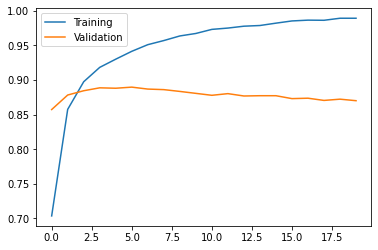

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E), h.history['acc'], label = 'Training')
plt.plot(range(E), h.history['val_acc'], label = 'Validation')
plt.legend()
plt.show()

In [0]:
loss, acc , recall= model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc * 100)

782/782 [==============================] - 1s 1ms/step - loss: 0.8287 - acc: 0.8462 - recall_1: 0.8222
Test set accuracy:  84.6239984035492


In [0]:
import numpy as np

prediction = model.predict(np.expand_dims(x_test[0], axis = 0))
class_names = ['Negative', 'Positive']
print(class_names[np.argmax(prediction[0])])

Negative


In [0]:
def encode (review):
  new_review = []
  for i in review:
    new_review.append(word_index[i])
  return new_review

new_rex = "best movie ever"
test = encode(new_rex.split())
print(test)


prediction = model.predict(np.expand_dims(x_train[115], axis = 0))
class_names = ['Negative', 'Positive']
print(class_names[np.argmax(prediction[0])])


[115, 17, 123]
Negative


In [0]:
print(y_train[0])